In [173]:
import torch
import matplotlib.pyplot as plt
import numpy as np

x = torch.arange(4.0, requires_grad=True)
y = 2 * torch.dot(x, x)
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

** Question 1 : Why is the second derivative much more expensive to compute than the first derivative? **

Basically, when you compute the derivative of a fonction $ f $ by a matrix $ X $ of shape $ n * n $, you are computing a $ n * n $ matrix of second partial derivative :

let $ x = (x_1, ..., x_n) $

first f derivative is :

$ \nabla_x f(x_1, ..., x_n) = [\frac{\partial f}{\partial x_1}, ..., \frac{\partial f}{\partial x_n}]^\top$

and second f derivative is :

$ \nabla^2_x f(x_1, ..., x_n) = [\nabla_x \frac{\partial f}{\partial x_1}, ...,\nabla_x \frac{\partial f}{\partial x_n}]^\top$

where :

$ \forall i \in \mathbb{R}^+ $ and $ i \leq n $

$ \nabla_x \frac{\partial f}{\partial x_i} = [\frac{\partial f}{\partial x_n*x_1}, ..., \frac{\partial f}{\partial x_n*x_i}]^\top $

Whe can see that the second f derivative is way more expansive to compute ($ ^2 $ more)


** Question 2 : After running the function for backpropagation, immediately run it again and see what happens. **

In [174]:
y.backward(retain_graph=True)
x.grad

RuntimeError: Trying to backward through the graph a second time, but the saved intermediate results have already been freed. Specify retain_graph=True when calling .backward() or autograd.grad() the first time.

So when torch compute the backpropagation, he destroy and free the graph. This is because when you use the backpropagation, you do it in a loop and it is tedious to free the memory manually.

** Question 3 : In the control flow example where we calculate the derivative of d with respect to a, what would happen if we changed the variable a to a random vector or matrix. At this point, the result of the calculation f(a) is no longer a scalar. What happens to the result? How do we analyze this? **

In [204]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [218]:
a = torch.randn(size=(1, 42, 42), requires_grad=True)
d = f(a)
d.sum().backward()

In [219]:
a.grad == d / a

tensor([[[True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         ...,
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True]]])

It still gives true because in the function, there is no operation with other vector so everything is broadcast. So each element of the matrix is independent and have the same derivative.

** Question 5 : Redesign an example of finding the gradient of the control flow. Run and analyze the result.**

In [232]:
def f(a):
    b = a * 2
    while b.norm() < 420:
        b = b * 2
    if b.sum() > 42:
        c = b
    else:
        c = 4 * b
    return c

In [233]:
a = torch.randn(size=(1, 42, 42), requires_grad=True)
d = f(a)
d.sum().backward()

In [234]:
a.grad == d / a

tensor([[[True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         ...,
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True]]])

Well it looks the same ....

** Question 5 : Let $ f(x)=sin(x) $. Plot $ f(x) $ and $ f'(x) $ , where the latter is computed without exploiting that $ f′(x)=cos(x) $ .

In [235]:
def f(x):
    return torch.sin(x)

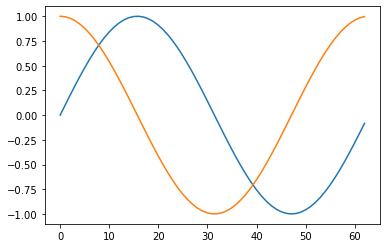

In [236]:
x = torch.arange(0, 2 * np.pi, 0.1, requires_grad=True)
_fx = f(x)
for i in range(_fx.shape[0]):
    _fx[i].backward(retain_graph = True)
plt.plot(_fx.detach())
plt.plot(x.grad)
plt.show()